<a href="https://colab.research.google.com/github/chrispalaguachi/audioworkshop/blob/main/WIS_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weizmann Institute Audio Workshop

Hello everyone!

Please take a few minutes to get to know some of the people next to you.

I'd like to start by getting to know why some of you have selected to join this session today.

Please click on this following link:

https://www.menti.com/al1h5rqcn7kg

# Understanding audio data in naturalistic classroom settings

Slides:
https://docs.google.com/presentation/d/1jhNIA5TDCyR3SkTsHShM0nD2J1cCoYUJzDSGB92h5lo/edit#slide=id.p

# Exploring VAD output (openSMILE)



Unfortunately we were not able to get openSMILE to run through the virtual machine on google colab.

So for this following activity we won't run VAD, but we will explore what the VAD output looks like.

However, my colleague (Eugene Cox) made a guide for anyone interested in installing and running it on their own device.

Found here:

https://docs.google.com/document/d/1CnxhM0XCp2ky6ey-wg5u0PkX87wnyvsndpIjGYpO6rE/edit?usp=sharing

Additional information can be found in this github:

https://github.com/audeering/opensmile/releases

Uploading VAD group audio data:

In [1]:
import requests

# Dictionary mapping file IDs to names
file_id_name_mapping = {
    "1yHbP4vGljnDP9X_qCg60RCTFncO-AKcf": "blue",
    "1fUn1LJznb5ykhs6MZQ33fSGUyJwTv6KC": "fuchsia",
    "1wifIZVWAsq6K7MXJarpvWqfRrzZa2QJC": "green",
    "1wkuFTScVJ2OLPDTz-2EUBv8xl9jcoWpy": "orange",
    "1JsXl1cXbq7vxiOEWUWI6UKHRMaR2pjHE": "purple",
    "1Pdu1Lxq1eULDn54CpzP9DcSRPqbLDq99": "red",
    "1fovPA8Dk3NT8-PZ2aVcWNctF_W2RAUNl": "yellow",
}

# Define the desired order of file IDs
desired_order = [
    "1yHbP4vGljnDP9X_qCg60RCTFncO-AKcf",
    "1fUn1LJznb5ykhs6MZQ33fSGUyJwTv6KC",
    "1wifIZVWAsq6K7MXJarpvWqfRrzZa2QJC",
    "1wkuFTScVJ2OLPDTz-2EUBv8xl9jcoWpy",
    "1JsXl1cXbq7vxiOEWUWI6UKHRMaR2pjHE",
    "1Pdu1Lxq1eULDn54CpzP9DcSRPqbLDq99",
    "1fovPA8Dk3NT8-PZ2aVcWNctF_W2RAUNl",
]

# Loop through each file ID in the desired order and download the corresponding file
for file_id in desired_order:
    # Get the corresponding name from the dictionary
    name = file_id_name_mapping[file_id]

    # Construct the download URL
    download_url = f"https://docs.google.com/uc?export=download&id={file_id}"

    # Send a GET request to the download URL and save the response content
    response = requests.get(download_url)

    # Construct the filename based on the name
    filename = f"{name}.csv"

    with open(filename, "wb") as f:
        f.write(response.content)

    print(f"Downloaded {filename}")


Downloaded blue.csv
Downloaded fuchsia.csv
Downloaded green.csv
Downloaded orange.csv
Downloaded purple.csv
Downloaded red.csv
Downloaded yellow.csv


Now that we've downloaded some of these files, let's open some of them up and take see what openSMILE's VAD output looks like out of the box.

In order to do this:

*   Look to the far left of google colab and click on the folder icon

  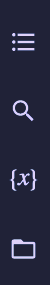
* Within this folder you should see all the different colored group VAD data (.csv) files.
*   If you don't see the files, click on the folder icon with the refresh symbol (icon 2nd from the left).

  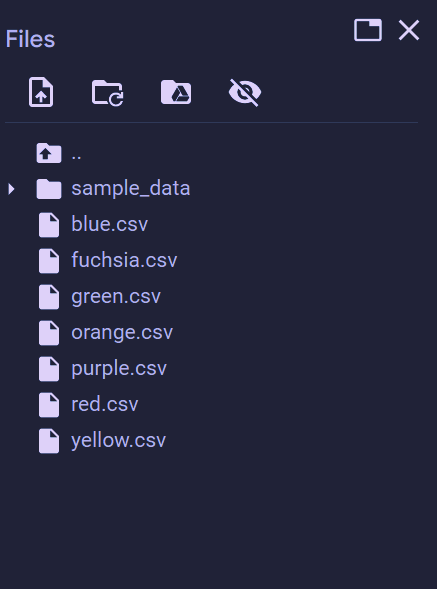
*   Click on one of the colored (blue, fuchsia, green, orange, purple, red, yellow) .csv files
*   On the right side of your google colab, you should see something like the following:
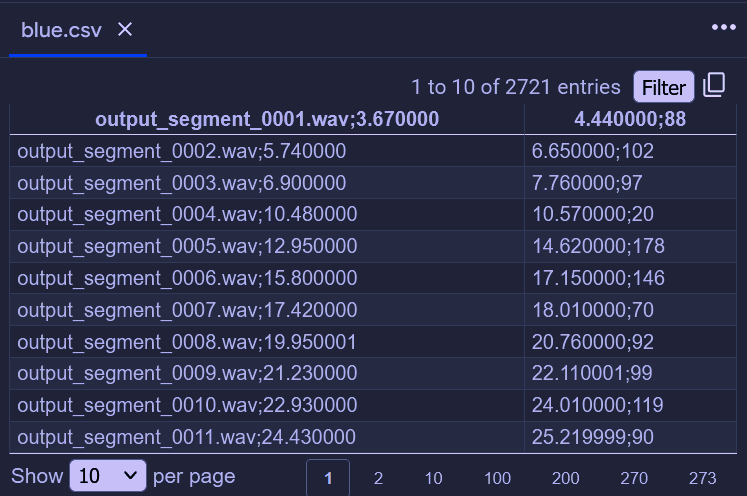
*   Feel free to mess around with the number of entires per page or click through the pages

# Group dicussion -- talk to people next to you


With your group:
*   Try to explore what is going on with this output
*   What do we think is going on here?
*   What is going on in the 1st and 2nd column?
*   What kind of information do you think VAD output data is telling us about group discussion?



# Whole class dicussion -- let's talk about it
* So what we think is going on?


# Preprocessing Blue Group Voice Activity Detection Data

Please pay attention to the hands raised.

Who is familar with R?

Who is familiar with python?

If anyone gets stuck or if we are going too fast, feel free to ask me to slow down or ask somone around you for help. I will try my best to help!

In order for us to use R commands we have to run "%load_ext rpy2.ipython".

Essentially this allows for R and python to work simultaneously.

In [2]:
%load_ext rpy2.ipython

Now that we've used that command, we will now use "%%R" when running R commands

Install and the R packages needed for merging the different colored group data

In [3]:
%%R
library(dtplyr)
library(tidyr)
library(dbplyr)
library(dplyr)
library(readr)
library(ggplot2)

Attaching package: ‘dplyr’



    ident, sql



    filter, lag



    intersect, setdiff, setequal, union




Call the blue.csv file using the "read_csv" function.

We will also fix the column data so that the .csv files is read into R properly ("output_segment_0001.wav;3.670000  4.440000;88" is no longer in at the top of
the dataset like in when opening the .csv file manually).

In [4]:
%%R
blue <- read_csv("blue.csv", col_names = c("segment_file", "start_time"))

blue <- blue %>% mutate(speaker = "Blue")

blue

Rows: 2722 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): segment_file, start_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 2,722 × 3
   segment_file                      start_time    speaker
   <chr>                             <chr>         <chr>  
 1 output_segment_0001.wav;3.670000  4.440000;88   Blue   
 2 output_segment_0002.wav;5.740000  6.650000;102  Blue   
 3 output_segment_0003.wav;6.900000  7.760000;97   Blue   
 4 output_segment_0004.wav;10.480000 10.570000;20  Blue   
 5 output_segment_0005.wav;12.950000 14.620000;178 Blue   
 6 output_segment_0006.wav;15.800000 17.150000;146 Blue   
 7 output_segment_0007.wav;17.420000 18.010000;70  Blue   
 8 output_segment_0008.wav;19.950001 20.760000;92  Blue   
 9 output_segment_0009.wav;21.230000 22.110001;99  Blue   
10 output_segment_0010

Let's fix the data by adding semicolon seperater.

Let's also add necessary corresponding variables (start time, end time, and count frames).

In [5]:
%%R
blue <- blue %>% separate(segment_file, into = c("segmentfile", "starttime"), sep = ";") %>% separate(start_time, into = c("end_time", "count_frames"), sep = ";")

blue

# A tibble: 2,722 × 5
   segmentfile             starttime end_time  count_frames speaker
   <chr>                   <chr>     <chr>     <chr>        <chr>  
 1 output_segment_0001.wav 3.670000  4.440000  88           Blue   
 2 output_segment_0002.wav 5.740000  6.650000  102          Blue   
 3 output_segment_0003.wav 6.900000  7.760000  97           Blue   
 4 output_segment_0004.wav 10.480000 10.570000 20           Blue   
 5 output_segment_0005.wav 12.950000 14.620000 178          Blue   
 6 output_segment_0006.wav 15.800000 17.150000 146          Blue   
 7 output_segment_0007.wav 17.420000 18.010000 70           Blue   
 8 output_segment_0008.wav 19.950001 20.760000 92           Blue   
 9 output_segment_0009.wav 21.230000 22.110001 99           Blue   
10 output_segment_0010.wav 22.930000 24.010000 119          Blue   
# ℹ 2,712 more rows
# ℹ Use `print(n = ...)` to see more rows


Compare the previous and now new dataset.

Do these values make more sense?


What other questions do we have about this dataset?



Let's change the corresponding variable types.

In [6]:
%%R
blue$starttime <- as.numeric(blue$starttime)
blue$end_time <- as.numeric(blue$end_time)
blue$count_frames <- as.numeric(blue$count_frames)
blue$speaker <- as.factor(blue$speaker)

blue

# A tibble: 2,722 × 5
   segmentfile             starttime end_time count_frames speaker
   <chr>                       <dbl>    <dbl>        <dbl> <fct>  
 1 output_segment_0001.wav      3.67     4.44           88 Blue   
 2 output_segment_0002.wav      5.74     6.65          102 Blue   
 3 output_segment_0003.wav      6.9      7.76           97 Blue   
 4 output_segment_0004.wav     10.5     10.6            20 Blue   
 5 output_segment_0005.wav     13.0     14.6           178 Blue   
 6 output_segment_0006.wav     15.8     17.2           146 Blue   
 7 output_segment_0007.wav     17.4     18.0            70 Blue   
 8 output_segment_0008.wav     20.0     20.8            92 Blue   
 9 output_segment_0009.wav     21.2     22.1            99 Blue   
10 output_segment_0010.wav     22.9     24.0           119 Blue   
# ℹ 2,712 more rows
# ℹ Use `print(n = ...)` to see more rows


Since sometimes we don't always have the ability to start our audio recording devices at the same time. We can find those start/end time post data collection and create new variables that have offset time.

For example the offset time for this group's mic is "+ 609 seconds".

Below we will see how to add those values using R and create new "offset" start time/endttimes for the new dataset.

In [7]:
%%R

blue <- blue %>% mutate(offset_starttime = starttime + 609)
blue <- blue %>% mutate(offset_end_time = end_time + 609)

blue

# A tibble: 2,722 × 7
   segmentfile          starttime end_time count_frames speaker offset_starttime
   <chr>                    <dbl>    <dbl>        <dbl> <fct>              <dbl>
 1 output_segment_0001…      3.67     4.44           88 Blue                613.
 2 output_segment_0002…      5.74     6.65          102 Blue                615.
 3 output_segment_0003…      6.9      7.76           97 Blue                616.
 4 output_segment_0004…     10.5     10.6            20 Blue                619.
 5 output_segment_0005…     13.0     14.6           178 Blue                622.
 6 output_segment_0006…     15.8     17.2           146 Blue                625.
 7 output_segment_0007…     17.4     18.0            70 Blue                626.
 8 output_segment_0008…     20.0     20.8            92 Blue                629.
 9 output_segment_0009…     21.2     22.1            99 Blue                630.
10 output_segment_0010…     22.9     24.0           119 Blue                632.
# ℹ 2,

It is also a good idea to double check if there are duplicate data points. Sometimes when you run openSMILE mutiple times (whether or not that's if it crashes or by accident) it will read duplicate files into the .csv file you are working with.

The following function "distinct" removes duplicates. To see if there are duplicate data points, you can look at the number of rows of data (2,722) in the "blue" dataset and compare it to this "blue_test" dataset.

In other words, since we are collecting unique turns, there should not be a case in the dataset where there are duplicate points.

In [8]:
%%R

blue_test<- distinct(blue)

blue_test

# A tibble: 2,722 × 7
   segmentfile          starttime end_time count_frames speaker offset_starttime
   <chr>                    <dbl>    <dbl>        <dbl> <fct>              <dbl>
 1 output_segment_0001…      3.67     4.44           88 Blue                613.
 2 output_segment_0002…      5.74     6.65          102 Blue                615.
 3 output_segment_0003…      6.9      7.76           97 Blue                616.
 4 output_segment_0004…     10.5     10.6            20 Blue                619.
 5 output_segment_0005…     13.0     14.6           178 Blue                622.
 6 output_segment_0006…     15.8     17.2           146 Blue                625.
 7 output_segment_0007…     17.4     18.0            70 Blue                626.
 8 output_segment_0008…     20.0     20.8            92 Blue                629.
 9 output_segment_0009…     21.2     22.1            99 Blue                630.
10 output_segment_0010…     22.9     24.0           119 Blue                632.
# ℹ 2,

Now that we've completed the blue group's data, we can follow the same steps for the other colored group data (fuchsia, green, orange, purple, red, and yellow).

In [9]:
%%R
##fuchsia
fuchsia <- read_csv("fuchsia.csv", col_names = c("segment_file", "start_time"))

fuchsia  <- fuchsia %>% mutate(speaker = "Fuchsia")

fuchsia <- fuchsia %>% separate(segment_file, into = c("segmentfile", "starttime"), sep = ";") %>% separate(start_time, into = c("end_time", "count_frames"), sep = ";")

fuchsia$starttime <- as.numeric(fuchsia$starttime)
fuchsia$end_time <- as.numeric(fuchsia$end_time)
fuchsia$count_frames <- as.numeric(fuchsia$count_frames)
fuchsia$speaker <- as.factor(fuchsia$speaker)

fuchsia <- fuchsia %>% mutate(offset_starttime = starttime + 370)
fuchsia <- fuchsia %>% mutate(offset_end_time = end_time + 370)

fuchsia_test<- distinct(fuchsia)

##green
green <- read_csv("green.csv", col_names = c("segment_file", "start_time"))

green <- green %>% mutate(speaker = "Green")

green <- green %>% separate(segment_file, into = c("segmentfile", "starttime"), sep = ";") %>% separate(start_time, into = c("end_time", "count_frames"), sep = ";")

green$starttime <- as.numeric(green$starttime)
green$end_time <- as.numeric(green$end_time)
green$count_frames <- as.numeric(green$count_frames)
green$speaker <- as.factor(green$speaker)

green <- green %>% mutate(offset_starttime = starttime + 601)
green <- green %>% mutate(offset_end_time = end_time + 601)

green_test<- distinct(green)

##orange
orange <- read_csv("orange.csv", col_names = c("segment_file", "start_time"))

orange <- orange %>% mutate(speaker = "Orange")

orange <- orange %>% separate(segment_file, into = c("segmentfile", "starttime"), sep = ";") %>% separate(start_time, into = c("end_time", "count_frames"), sep = ";")

orange$starttime <- as.numeric(orange$starttime)
orange$end_time <- as.numeric(orange$end_time)
orange$count_frames <- as.numeric(orange$count_frames)
orange$speaker <- as.factor(orange$speaker)

orange <- orange %>% mutate(offset_starttime = starttime + 592)
orange <- orange %>% mutate(offset_end_time = end_time + 592)

orange_test<- distinct(orange)

##purple
purple <- read_csv("purple.csv", col_names = c("segment_file", "start_time"))

purple <- purple %>% mutate(speaker = "Purple")

purple <- purple %>% separate(segment_file, into = c("segmentfile", "starttime"), sep = ";") %>% separate(start_time, into = c("end_time", "count_frames"), sep = ";")

purple$starttime <- as.numeric(purple$starttime)
purple$end_time <- as.numeric(purple$end_time)
purple$count_frames <- as.numeric(purple$count_frames)
purple$speaker <- as.factor(purple$speaker)

purple <- purple %>% mutate(offset_starttime = starttime + 586)
purple <- purple %>% mutate(offset_end_time = end_time + 586)

purple_test<- distinct(purple)

##red
red <- read_csv("red.csv", col_names = c("segment_file", "start_time"))

red <- red %>% mutate(speaker = "Red")

red <- red %>% separate(segment_file, into = c("segmentfile", "starttime"), sep = ";") %>% separate(start_time, into = c("end_time", "count_frames"), sep = ";")

red$starttime <- as.numeric(red$starttime)
red$end_time <- as.numeric(red$end_time)
red$count_frames <- as.numeric(red$count_frames)
red$speaker <- as.factor(red$speaker)

red <- red %>% mutate(offset_starttime = starttime + 365)
red <- red %>% mutate(offset_end_time = end_time + 365)

red_test<- distinct(red)

##yellow
yellow <- read_csv("yellow.csv", col_names = c("segment_file", "start_time"))

yellow <- yellow %>% mutate(speaker = "Yellow")

yellow <- yellow %>% separate(segment_file, into = c("segmentfile", "starttime"), sep = ";") %>% separate(start_time, into = c("end_time", "count_frames"), sep = ";")

yellow$starttime <- as.numeric(yellow$starttime)
yellow$end_time <- as.numeric(yellow$end_time)
yellow$count_frames <- as.numeric(yellow$count_frames)
yellow$speaker <- as.factor(yellow$speaker)

yellow <- yellow %>% mutate(offset_starttime = starttime + 372)
yellow <- yellow %>% mutate(offset_end_time = end_time + 372)

yellow_test<- distinct(yellow)

Rows: 3335 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): segment_file, start_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2845 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): segment_file, start_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2684 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): segment_file, start_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2868 Columns: 2
── Column specification ─────────────────────────────────

Now that we've process all 7 groups, lets double check and see if the formatting variables are okay before trying to merge the data into one big dataset (the variable types and all columns need to be allign before using the "rbind" function in R).

While taking a look to confirm that the variable type for and the columns are alligned, what do we notice for the number of rows in the different datasets?

Are the same? Are they different?

In [10]:
%%R
blue

# A tibble: 2,722 × 7
   segmentfile          starttime end_time count_frames speaker offset_starttime
   <chr>                    <dbl>    <dbl>        <dbl> <fct>              <dbl>
 1 output_segment_0001…      3.67     4.44           88 Blue                613.
 2 output_segment_0002…      5.74     6.65          102 Blue                615.
 3 output_segment_0003…      6.9      7.76           97 Blue                616.
 4 output_segment_0004…     10.5     10.6            20 Blue                619.
 5 output_segment_0005…     13.0     14.6           178 Blue                622.
 6 output_segment_0006…     15.8     17.2           146 Blue                625.
 7 output_segment_0007…     17.4     18.0            70 Blue                626.
 8 output_segment_0008…     20.0     20.8            92 Blue                629.
 9 output_segment_0009…     21.2     22.1            99 Blue                630.
10 output_segment_0010…     22.9     24.0           119 Blue                632.
# ℹ 2,

In [11]:
%%R
fuchsia

# A tibble: 3,335 × 7
   segmentfile          starttime end_time count_frames speaker offset_starttime
   <chr>                    <dbl>    <dbl>        <dbl> <fct>              <dbl>
 1 output_segment_0001…      1.68     1.74           17 Fuchsia             372.
 2 output_segment_0002…      2.13     2.2            18 Fuchsia             372.
 3 output_segment_0003…      3.73     4.27           65 Fuchsia             374.
 4 output_segment_0004…      4.6      4.73           24 Fuchsia             375.
 5 output_segment_0005…      5.18     5.42           35 Fuchsia             375.
 6 output_segment_0006…      8.06     8.5            55 Fuchsia             378.
 7 output_segment_0007…      8.96     9.83           98 Fuchsia             379.
 8 output_segment_0008…     10.6     10.8            27 Fuchsia             381.
 9 output_segment_0009…     12.2     13.3           125 Fuchsia             382.
10 output_segment_0010…     13.6     14.0            45 Fuchsia             384.
# ℹ 3,

In [12]:
%%R
green

# A tibble: 2,845 × 7
   segmentfile          starttime end_time count_frames speaker offset_starttime
   <chr>                    <dbl>    <dbl>        <dbl> <fct>              <dbl>
 1 output_segment_0001…      1.97     3.22          136 Green               603.
 2 output_segment_0002…      3.46     3.6            25 Green               604.
 3 output_segment_0003…      4.7      8.25          366 Green               606.
 4 output_segment_0004…     10.2     10.2            20 Green               611.
 5 output_segment_0005…     13.5     15.0           162 Green               614.
 6 output_segment_0006…     15.5     16.3            95 Green               616.
 7 output_segment_0007…     17.6     19.1           157 Green               619.
 8 output_segment_0008…     19.4     25.7           644 Green               620.
 9 output_segment_0009…     26.2     26.4            27 Green               627.
10 output_segment_0010…     26.7     28.5           191 Green               628.
# ℹ 2,

In [13]:
%%R
orange

# A tibble: 2,684 × 7
   segmentfile          starttime end_time count_frames speaker offset_starttime
   <chr>                    <dbl>    <dbl>        <dbl> <fct>              <dbl>
 1 output_segment_0001…      1        1.74           85 Orange              593 
 2 output_segment_0002…      2.16     3.56          151 Orange              594.
 3 output_segment_0003…      3.81     3.96           26 Orange              596.
 4 output_segment_0004…      4.17     5.95          189 Orange              596.
 5 output_segment_0005…      6.26     7.36          121 Orange              598.
 6 output_segment_0006…      7.88     8.26           49 Orange              600.
 7 output_segment_0007…      8.53     8.95           53 Orange              601.
 8 output_segment_0008…      9.17    11.0           198 Orange              601.
 9 output_segment_0009…     11.6     12.1            63 Orange              604.
10 output_segment_0010…     13.0     14.0           110 Orange              605.
# ℹ 2,

In [14]:
%%R
purple

# A tibble: 2,868 × 7
   segmentfile          starttime end_time count_frames speaker offset_starttime
   <chr>                    <dbl>    <dbl>        <dbl> <fct>              <dbl>
 1 output_segment_0001…      1        3.43          254 Purple              587 
 2 output_segment_0002…      3.75     4.16           52 Purple              590.
 3 output_segment_0003…      4.64     6.44          191 Purple              591.
 4 output_segment_0004…      6.74     8.9           227 Purple              593.
 5 output_segment_0005…      9.11    10.3           134 Purple              595.
 6 output_segment_0006…     11.4     11.9            59 Purple              597.
 7 output_segment_0007…     12.6     12.8            28 Purple              599.
 8 output_segment_0008…     13.2     14.4           139 Purple              599.
 9 output_segment_0009…     14.6     15.1            60 Purple              601.
10 output_segment_0010…     15.4     15.8            49 Purple              601.
# ℹ 2,

In [15]:
%%R
red

# A tibble: 3,078 × 7
   segmentfile          starttime end_time count_frames speaker offset_starttime
   <chr>                    <dbl>    <dbl>        <dbl> <fct>              <dbl>
 1 output_segment_0001…      1        3.37          248 Red                 366 
 2 output_segment_0002…      3.59     5.23          175 Red                 369.
 3 output_segment_0003…      5.94     7.14          131 Red                 371.
 4 output_segment_0004…      9.02     9.89           98 Red                 374.
 5 output_segment_0005…     10.2     10.2            17 Red                 375.
 6 output_segment_0006…     13.3     13.5            36 Red                 378.
 7 output_segment_0007…     14.4     14.8            47 Red                 379.
 8 output_segment_0008…     15.6     15.8            30 Red                 381.
 9 output_segment_0009…     17.3     20.0           281 Red                 382.
10 output_segment_0010…     20.2     21.1           103 Red                 385.
# ℹ 3,

In [16]:
%%R
yellow

# A tibble: 2,970 × 7
   segmentfile          starttime end_time count_frames speaker offset_starttime
   <chr>                    <dbl>    <dbl>        <dbl> <fct>              <dbl>
 1 output_segment_0001…      1.24     2.18          105 Yellow              373.
 2 output_segment_0002…      4.46     4.62           27 Yellow              376.
 3 output_segment_0003…      5.49     5.86           48 Yellow              377.
 4 output_segment_0004…      6.05     6.31           37 Yellow              378.
 5 output_segment_0005…      9.98    11.3           140 Yellow              382.
 6 output_segment_0006…     11.5     12.5           109 Yellow              384.
 7 output_segment_0007…     13.1     13.9            96 Yellow              385.
 8 output_segment_0008…     15.4     16.7           139 Yellow              387.
 9 output_segment_0009…     17.0     18.2           125 Yellow              389.
10 output_segment_0010…     19.9     23.4           362 Yellow              392.
# ℹ 2,

# Merging all group audio data and filtering data

Afer ensuring that variable type and columns are alligned, in this section we will us the "rbind" to merge the data into 1 dataset distinguishable by the "speaker" variable and create a duration variable (duration is useful in helping calculate how long someone is speaking for when a turn of human speech is detected by the VAD).


In [17]:
%%R
MergedAudio_14_03_04 <- rbind(blue,fuchsia,green,orange,purple,red,yellow)

CompletedMergedAudio_14_03_04 <- MergedAudio_14_03_04 %>% mutate(duration = offset_end_time - offset_starttime)

We will also use the "write.csv" function to save the data as a .csv.

In [18]:
%%R
write.csv(CompletedMergedAudio_14_03_04,"CompletedMergedAudio_14_03_04.csv", row.names = FALSE)

In addition, we will create a seperate dataset called "FilterCompletedMergedAudio_14_03_04" because similar to Donnelly et al. (2017), utterances less than .5 seconds(500 milliseconds) were unlikely to contain meaningful speech. We will see some histograms to see how this filtering affects the number of turns collected.

In [20]:
%%R
##FilterByHalfSecond
FilteredCompletedMergedAudio_14_03_04 <- filter(CompletedMergedAudio_14_03_04, duration >= 0.5)
##WriteFilteredFileToWorkingDir
write.csv(FilteredCompletedMergedAudio_14_03_04,"FilteredCompletedMergedAudio_14_03_04.csv", row.names = FALSE)

Let's take a look at the histogram before filtering

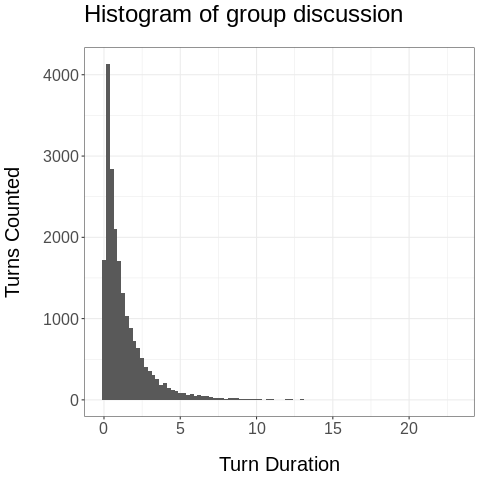

In [21]:
%%R
timehistogram <- ggplot(CompletedMergedAudio_14_03_04,aes(duration)) + geom_histogram(binwidth = .25) + theme_bw()

timehistogram + labs(title = "Histogram of group discussion", x = "Turn Duration", y = "Turns Counted", fill = "Group Discussion") +  scale_fill_discrete(labels = c("Before", "After")) + theme(text = element_text(size = 20)) + theme(panel.spacing = unit(2, "lines")) + theme(axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0))) +  theme(axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 0, l = 0))) + theme(plot.title = element_text(margin = margin(t = 0, r = 0, b = 20, l = 0)))

Let's look at the histogram after the filtering

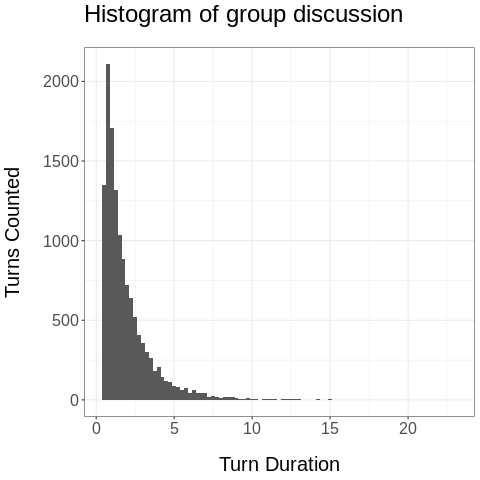

In [22]:
%%R
filteredtimehistogram <- ggplot(FilteredCompletedMergedAudio_14_03_04,aes(duration)) + geom_histogram(binwidth = .25) + theme_bw()

filteredtimehistogram + labs(title = "Histogram of group discussion", x = "Turn Duration", y = "Turns Counted", fill = "Group Discussion") +  scale_fill_discrete(labels = c("Before", "After")) + theme(text = element_text(size = 20)) + theme(panel.spacing = unit(2, "lines")) + theme(axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0))) +  theme(axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 0, l = 0))) + theme(plot.title = element_text(margin = margin(t = 0, r = 0, b = 20, l = 0)))

What do we noticed between the 2 histograms?

Who can tell me how many data points were removed using this filtering technique?

In [23]:
%%R
CompletedMergedAudio_14_03_04

# A tibble: 20,502 × 8
   segmentfile          starttime end_time count_frames speaker offset_starttime
   <chr>                    <dbl>    <dbl>        <dbl> <fct>              <dbl>
 1 output_segment_0001…      3.67     4.44           88 Blue                613.
 2 output_segment_0002…      5.74     6.65          102 Blue                615.
 3 output_segment_0003…      6.9      7.76           97 Blue                616.
 4 output_segment_0004…     10.5     10.6            20 Blue                619.
 5 output_segment_0005…     13.0     14.6           178 Blue                622.
 6 output_segment_0006…     15.8     17.2           146 Blue                625.
 7 output_segment_0007…     17.4     18.0            70 Blue                626.
 8 output_segment_0008…     20.0     20.8            92 Blue                629.
 9 output_segment_0009…     21.2     22.1            99 Blue                630.
10 output_segment_0010…     22.9     24.0           119 Blue                632.
# ℹ 2

In [24]:
%%R
FilteredCompletedMergedAudio_14_03_04

# A tibble: 13,159 × 8
   segmentfile          starttime end_time count_frames speaker offset_starttime
   <chr>                    <dbl>    <dbl>        <dbl> <fct>              <dbl>
 1 output_segment_0001…      3.67     4.44           88 Blue                613.
 2 output_segment_0002…      5.74     6.65          102 Blue                615.
 3 output_segment_0003…      6.9      7.76           97 Blue                616.
 4 output_segment_0005…     13.0     14.6           178 Blue                622.
 5 output_segment_0006…     15.8     17.2           146 Blue                625.
 6 output_segment_0007…     17.4     18.0            70 Blue                626.
 7 output_segment_0008…     20.0     20.8            92 Blue                629.
 8 output_segment_0009…     21.2     22.1            99 Blue                630.
 9 output_segment_0010…     22.9     24.0           119 Blue                632.
10 output_segment_0011…     24.4     25.2            90 Blue                633.
# ℹ 1

We can also plot some histograms and see how this filter affected turns collected in each group and can help us spot outliers per group.

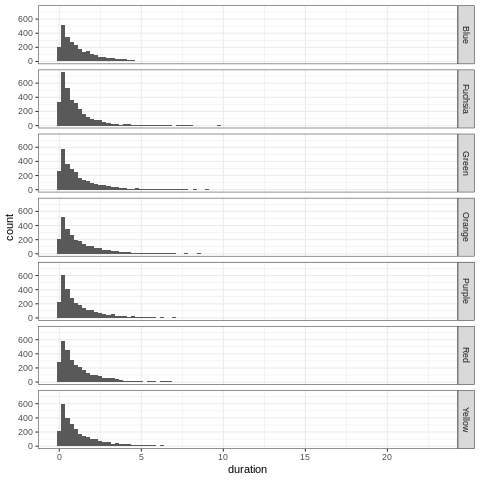

In [25]:
%%R
ggplot(CompletedMergedAudio_14_03_04,aes(duration)) + geom_histogram(binwidth = .25) + facet_grid(vars(speaker)) + theme_bw()

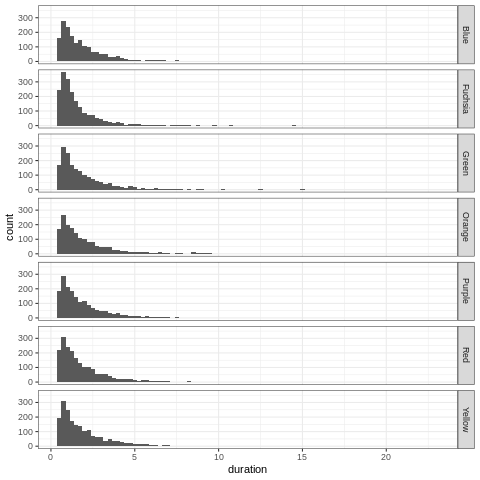

In [26]:
%%R
ggplot(FilteredCompletedMergedAudio_14_03_04,aes(duration)) + geom_histogram(binwidth = .25) + facet_grid(vars(speaker)) + theme_bw()

Are there any outliers that can be spotted?

What do these outliers tell us?

# Exploring whole classroom-level data

In this section we will plot group audio in a single ggplot, and we will see how adding layers of data affects how we make sense of group discussion patterns.

In the follow plots we plot the group audio data and use a "facet_wrap" function to allign but seperate the group data.

In the following plots do we see any differences?

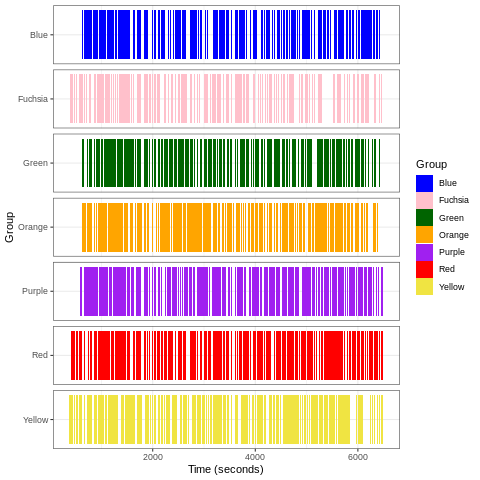

In [27]:
%%R
ggplot(data = CompletedMergedAudio_14_03_04) +
  geom_tile(aes(x = offset_starttime + duration/2, width = duration, y = speaker, fill = speaker)) +
  facet_wrap(~speaker, ncol = 1, scales = "free_y") +
  theme_bw() +
  scale_fill_manual(values = c("blue", "pink", "dark green", "orange", "purple", "red", "#F0E442")) +
  labs(x = "Time (seconds)", y = "Group", fill = "Group") +
  theme(strip.text = element_blank())


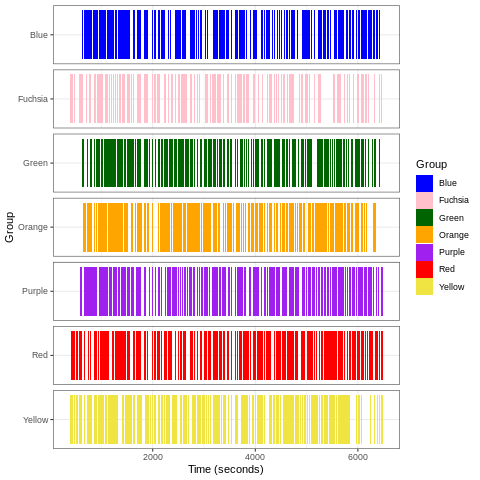

In [28]:
%%R
ggplot(data = FilteredCompletedMergedAudio_14_03_04) +
  geom_tile(aes(x = offset_starttime + duration/2, width = duration, y = speaker, fill = speaker)) +
  facet_wrap(~speaker, ncol = 1, scales = "free_y") +
  theme_bw() +
  scale_fill_manual(values = c("blue", "pink", "dark green", "orange", "purple", "red", "#F0E442")) +
  labs(x = "Time (seconds)", y = "Group", fill = "Group") +
  theme(strip.text = element_blank())


Let's try looking by using a "xlim" function to focus on the most right side of the data.

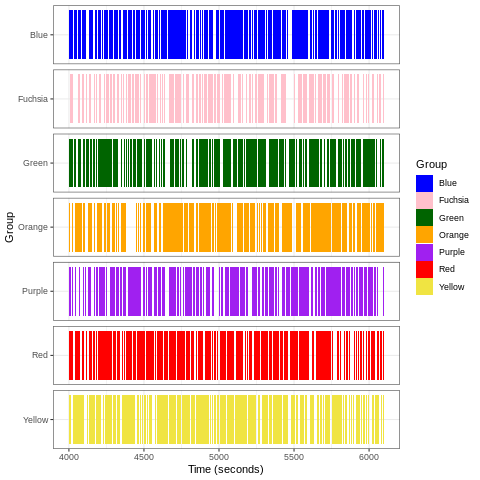

In [31]:
%%R
ggplot(data = CompletedMergedAudio_14_03_04) +
  geom_tile(aes(x = offset_starttime + duration/2, width = duration, y = speaker, fill = speaker)) +
  facet_wrap(~speaker, ncol = 1, scales = "free_y") +
  theme_bw() +
  scale_fill_manual(values = c("blue", "pink", "dark green", "orange", "purple", "red", "#F0E442")) +
  labs(x = "Time (seconds)", y = "Group", fill = "Group") +
  theme(strip.text = element_blank()) +
  xlim(c(4000, 6100))


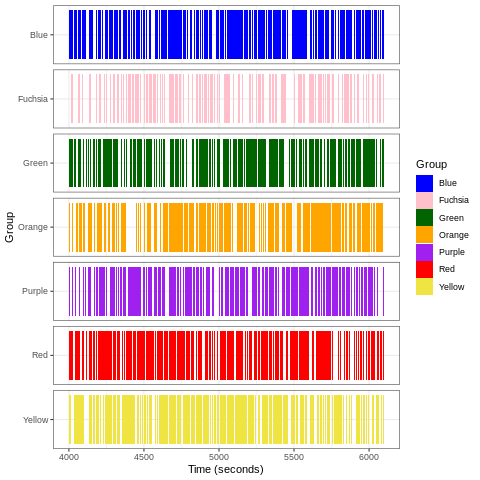

In [30]:
%%R
ggplot(data = FilteredCompletedMergedAudio_14_03_04) +
  geom_tile(aes(x = offset_starttime + duration/2, width = duration, y = speaker, fill = speaker)) +
  facet_wrap(~speaker, ncol = 1, scales = "free_y") +
  theme_bw() +
  scale_fill_manual(values = c("blue", "pink", "dark green", "orange", "purple", "red", "#F0E442")) +
  labs(x = "Time (seconds)", y = "Group", fill = "Group") +
  theme(strip.text = element_blank()) +
  xlim(c(4000, 6100))

Were you able to spot the differences in the yellow groups turns in the non-filtered vs the filtered dataset?

# Whole class discussion
So what does this data tell us so far?

What can we do to improve it?

# Exploring group turn data with teacher-group interaction content logs

Let's take a look at what adding a layer like content logs of teacher group interactions can tell us about group discussion. In this next plot, we will plot the group speech 30secs before a teacher group interaction, all the speech for the duration of the teacher interaction, and 30secs of group speech after a teacher interaction is finished.

In [32]:
import requests
# get the file ID from the shareable link
file_id = "11Fd9TAq4BtSIFCKtWS5C00Yh7bEI1Bs7"

# construct the download URL
download_url = f"https://docs.google.com/uc?export=download&id={file_id}"

# send a GET request to the download URL and save the response content
response = requests.get(download_url)
with open("VAD_Teacher_Interaction_Data.csv", "wb") as f:
    f.write(response.content)

Rows: 1437 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): segmentfile, speaker, igcode, newcode, before_during_after
dbl (8): starttime, end_time, count_frames, duration, offset_start_time, off...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


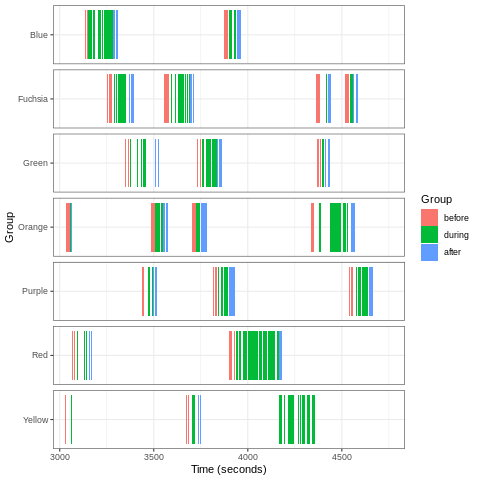

In [33]:
%%R
VAD_Teacher_Interaction_Data <- read_csv("VAD_Teacher_Interaction_Data.csv")
desired_order <- c("before", "during", "after")

VAD_Teacher_Interaction_Data$before_during_after <- factor(VAD_Teacher_Interaction_Data$before_during_after, levels = desired_order)

ggplot(VAD_Teacher_Interaction_Data) +
  geom_tile(aes(x = offset_start_time + duration / 2, width = duration, y = speaker, fill = before_during_after)) +
  facet_wrap(~speaker, ncol = 1, scales = "free_y") +
  theme_bw() +
  scale_color_brewer(palette = "Set2") +
  labs(x = "Time (seconds)", y = "Group", fill = "Group") +
  theme(strip.text = element_blank()) +
  coord_cartesian(xlim = c(3050, 4750))

# Whole class discussion

What does adding the layer of speech 30secs before and after teacher intervention tell us about group discussion patterns?

Is this more helpful than the previous data plots we did will all the turns detected?

Based off this graph, which one looks like it has the most post teacher-group interaction group discussion?


# Exploring audio data in a more complex dataset

Unfornuately, we do not have enough time to go through how this entire dataset was developed. However, we can spend some time understanding how adding different layers of data can help us contexualize group discussion.

In this dataset, we layered transcript and turn data to better spot areas of uncertainty. In this section we will spotlight a feature we thought was relevant to uncertainty -- loudness (Krist et al., 2023).

Import merged ASR and VAD dataset "ASR_VAD_Data.csv"

In [34]:
import requests
# get the file ID from the shareable link
file_id = "1nXju75HPbIC8iluF7kLJfv0XVwGaCYzL"

# construct the download URL
download_url = f"https://docs.google.com/uc?export=download&id={file_id}"

# send a GET request to the download URL and save the response content
response = requests.get(download_url)
with open("ASR_VAD_Data.csv", "wb") as f:
    f.write(response.content)


Call the data that was downloaded from google drive "ASR_VAD_Data"

In [35]:
%%R
ASR_VAD_Data <- read.csv("ASR_VAD_Data.csv")

Rearrange the data from loudest sum loudness to quietest

In [36]:
%%R
rearranged_data <- ASR_VAD_Data[order(-ASR_VAD_Data$pd_chunk_sum_loudness), ]

In th following line, we create matches for the dataset to select and subset the data.

In [37]:
%%R
unique_top_values <- unique(rearranged_data$pd_chunk_sum_loudness)
top_10_unique_values <- head(unique_top_values, 10)

subset_data <- subset(rearranged_data, pd_chunk_sum_loudness %in% top_10_unique_values)

In order for us to know that 10 different/unique chunks of 30sec data was selected, we'll run a bar plot to double check

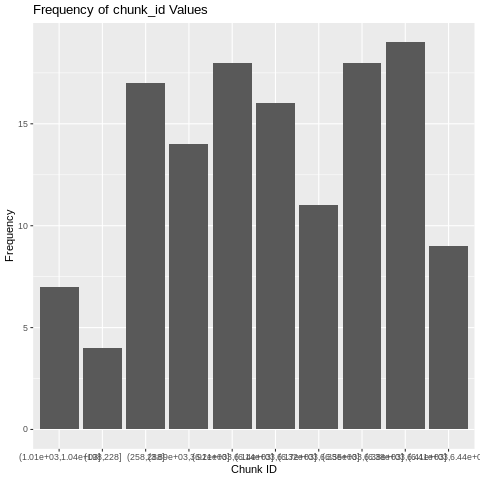

In [38]:
%%R
ggplot(subset_data, aes(x = chunk_id)) +
  geom_bar() +
  labs(title = "Frequency of chunk_id Values", x = "Chunk ID", y = "Frequency")

Now let's write the code and save it in our folder.

In [39]:
%%R
write.csv(subset_data, "Top10SumLoudestChunks.csv")

# Exploring the data top 10 loudest chunks we extracted

* Go to the files folder icon again on the left side of google collab.

* Make sure you see ASR_VAD_Data.csv and Top10LoudestChunks.csv.

* Click Top10LoudestChunks.csv.


In groups look at the data across and think about what these chunks of audio data can tell us.

What data do you think is useful in helping to explain loudness for each 30 second chunk?

* Does the transcript help?

* Do nwords (number of words) help?

* Does the words per second help?

* Does knowing the duration help?

After this activity we will listen to clips of the students' group discussion to better understand what is going on.

# Whole class discussion

Click on the following link to find the audio files. Here will be taking some notes on the group discussion and think qualitatively about what is going on in these top 10 loudest 30sec clips.

https://docs.google.com/presentation/d/1NJSQlTtJG79rAtitc8cDcioVRtZeLGIaIfRNejDzs6U/edit?usp=sharing

# Extra time for discussion

How can this be used in your reseach?

Let's talk brainstorm.

# Answers for questions asked during session

Q: How many turns were filtered out?

A: 7343 turns (slightly more than 1/3rd of all turns detected)

Q: what metric is VAD calculated in?

A: Seconds